# A gentle introduction to Google's Tesseract-OCR Engine

## Testing Tesseract's performance on clear images

In [15]:
#importing the Python-tesseract package
import pytesseract

In [16]:
#We import the Python Imaging Library (PIL) 
import PIL
#We import the Image module 
from PIL import Image

In [17]:
#We load our image
image1=Image.open('tesseract.JPG')

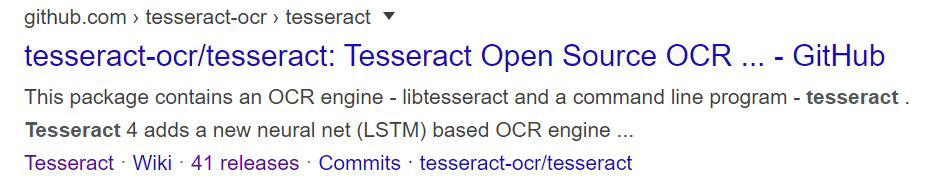

In [18]:
#We display our image
display(image1)

In [19]:
#We apply OCR on our image using pytesseract.image_to_string function
text1=pytesseract.image_to_string(image1)

In [20]:
#We print the text variable to see the result of the OCR
print(text1)

github.com > tesseract-ocr » tesseract

tesseract-ocr/tesseract: Tesseract Open Source OCR ... - GitHub

This package contains an OCR engine - libtesseract and a command line program - tesseract .
Tesseract 4 adds a new neural net (LSTM) based OCR engine ...
Tesseract - Wiki - 41 releases - Commits - tesseract-ocr/tesseract


## Testing Tesseract's performance on noisy images

In [21]:
image2=Image.open('noisy_image.JPG')

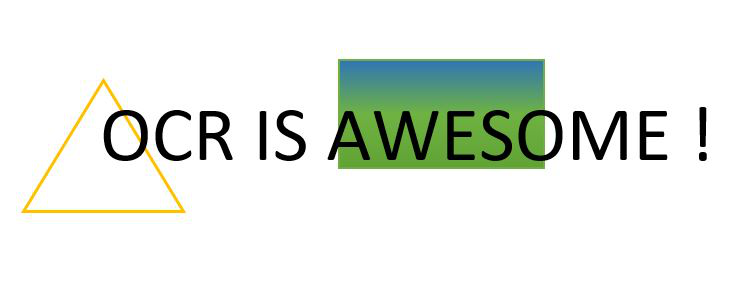

In [22]:
display(image2)

In [23]:
text2=pytesseract.image_to_string(image2)

In [24]:
text2

''

### First method: Converting image to grayscale

In [25]:
#convert PIL image to grayscale
gray= image2.convert('L')

In [26]:
#saving grayscale copy of image
gray.save('gray.jpg')

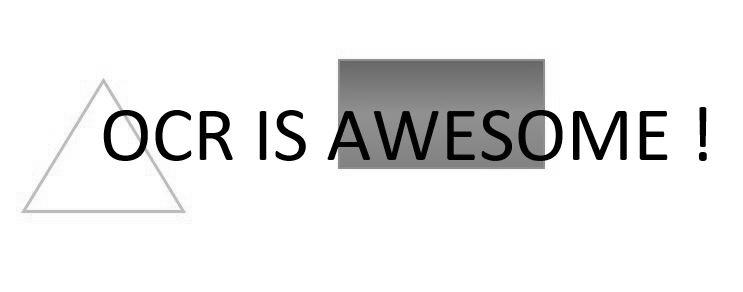

In [27]:
#loading the grayscale copy 
grayscale_image=Image.open('gray.jpg')
#and display it
display(grayscale_image)

In [28]:
#runnng Tesseract on the grayscale version of our image
text3=pytesseract.image_to_string(grayscale_image)

In [29]:
print(text3)

OCR IS AWesome !


### Second method: Image Binarization

In [30]:
#binarizing the image
binary= image2.convert('1')
binary.save('binary.jpg')

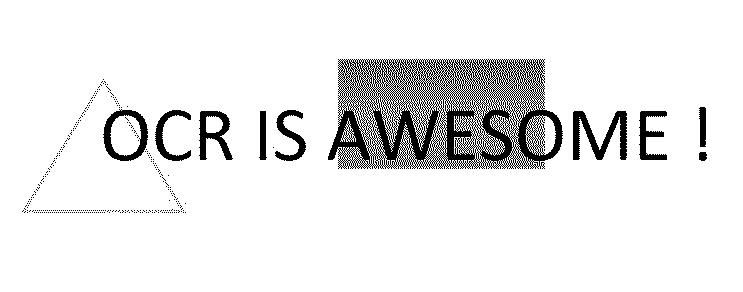

In [31]:
binary_image=Image.open('binary.jpg')
display(binary_image)

In [32]:
text4=pytesseract.image_to_string(binary_image)

In [33]:
print(text4)

OCR IS

 

 
      
   
 

   

 

a
ee

    

 

wc,
AP LS

    

im:


Threshold= 0



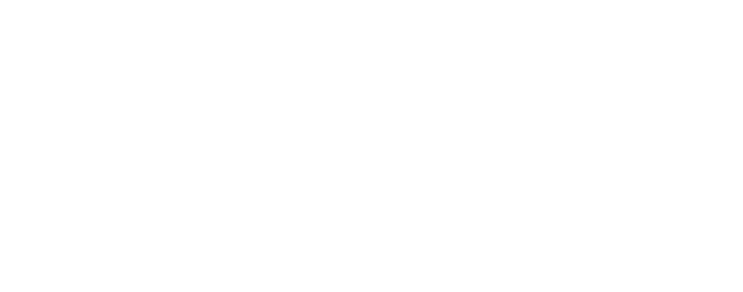


Threshold= 64



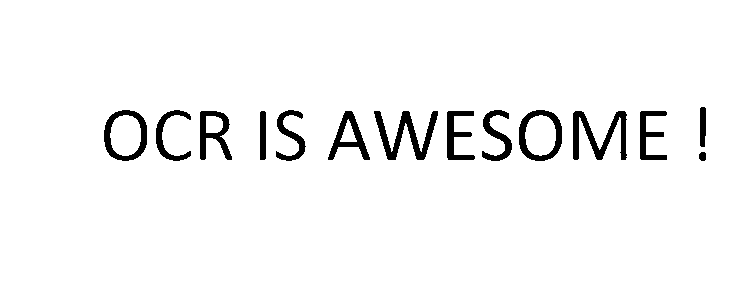

OCR IS AWESOME |!
Threshold= 128



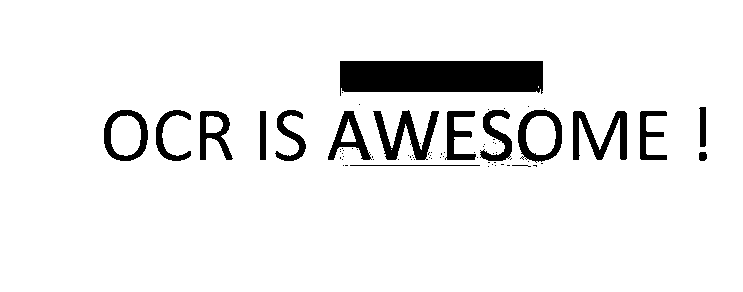

ae
OCR IS AWESOME |!
Threshold= 192



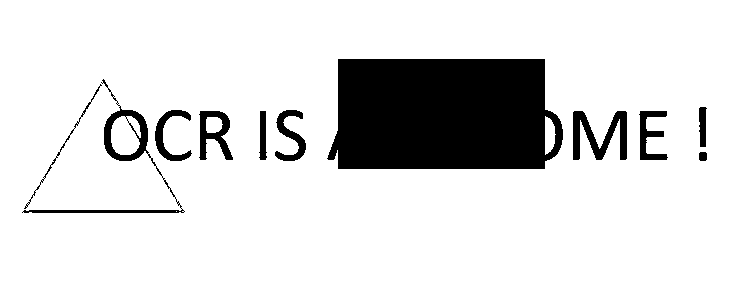


Threshold= 256



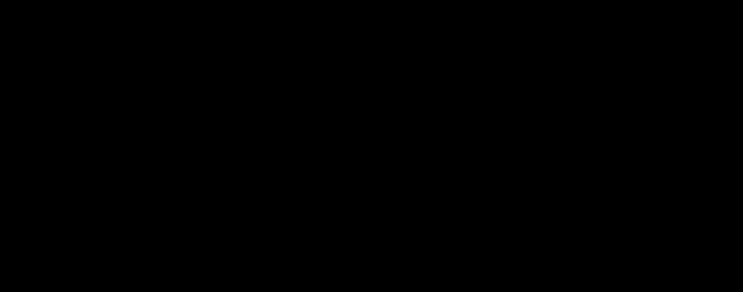

In [34]:
'''
This function :
1. Converts the image to grayscale
2. Loops through the image's pixels,
3. Compares the value of the pixel to the threshold: If the pixel is 
less than the threshold, it changes its value to 0(black), and to 255(white)
if not.
'''
def binarize(image, threshold):
    binary_image=image.convert("L")
    for x in range(binary_image.width):
        for y in range(binary_image.height):
            if binary_image.getpixel((x,y))< threshold: 
                binary_image.putpixel( (x,y), 0 )
            else:
                binary_image.putpixel( (x,y), 255 )
    return binary_image

for value in range(0,257,64):
    print("Threshold= " + str(value) + '\n')
    display(binarize(Image.open('noisy_image.JPG'), value))
    print(pytesseract.image_to_string(binarize(Image.open('noisy_image.JPG'),value)))

## Third method: Resizing your image

Initial image :


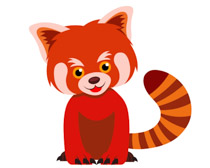

0


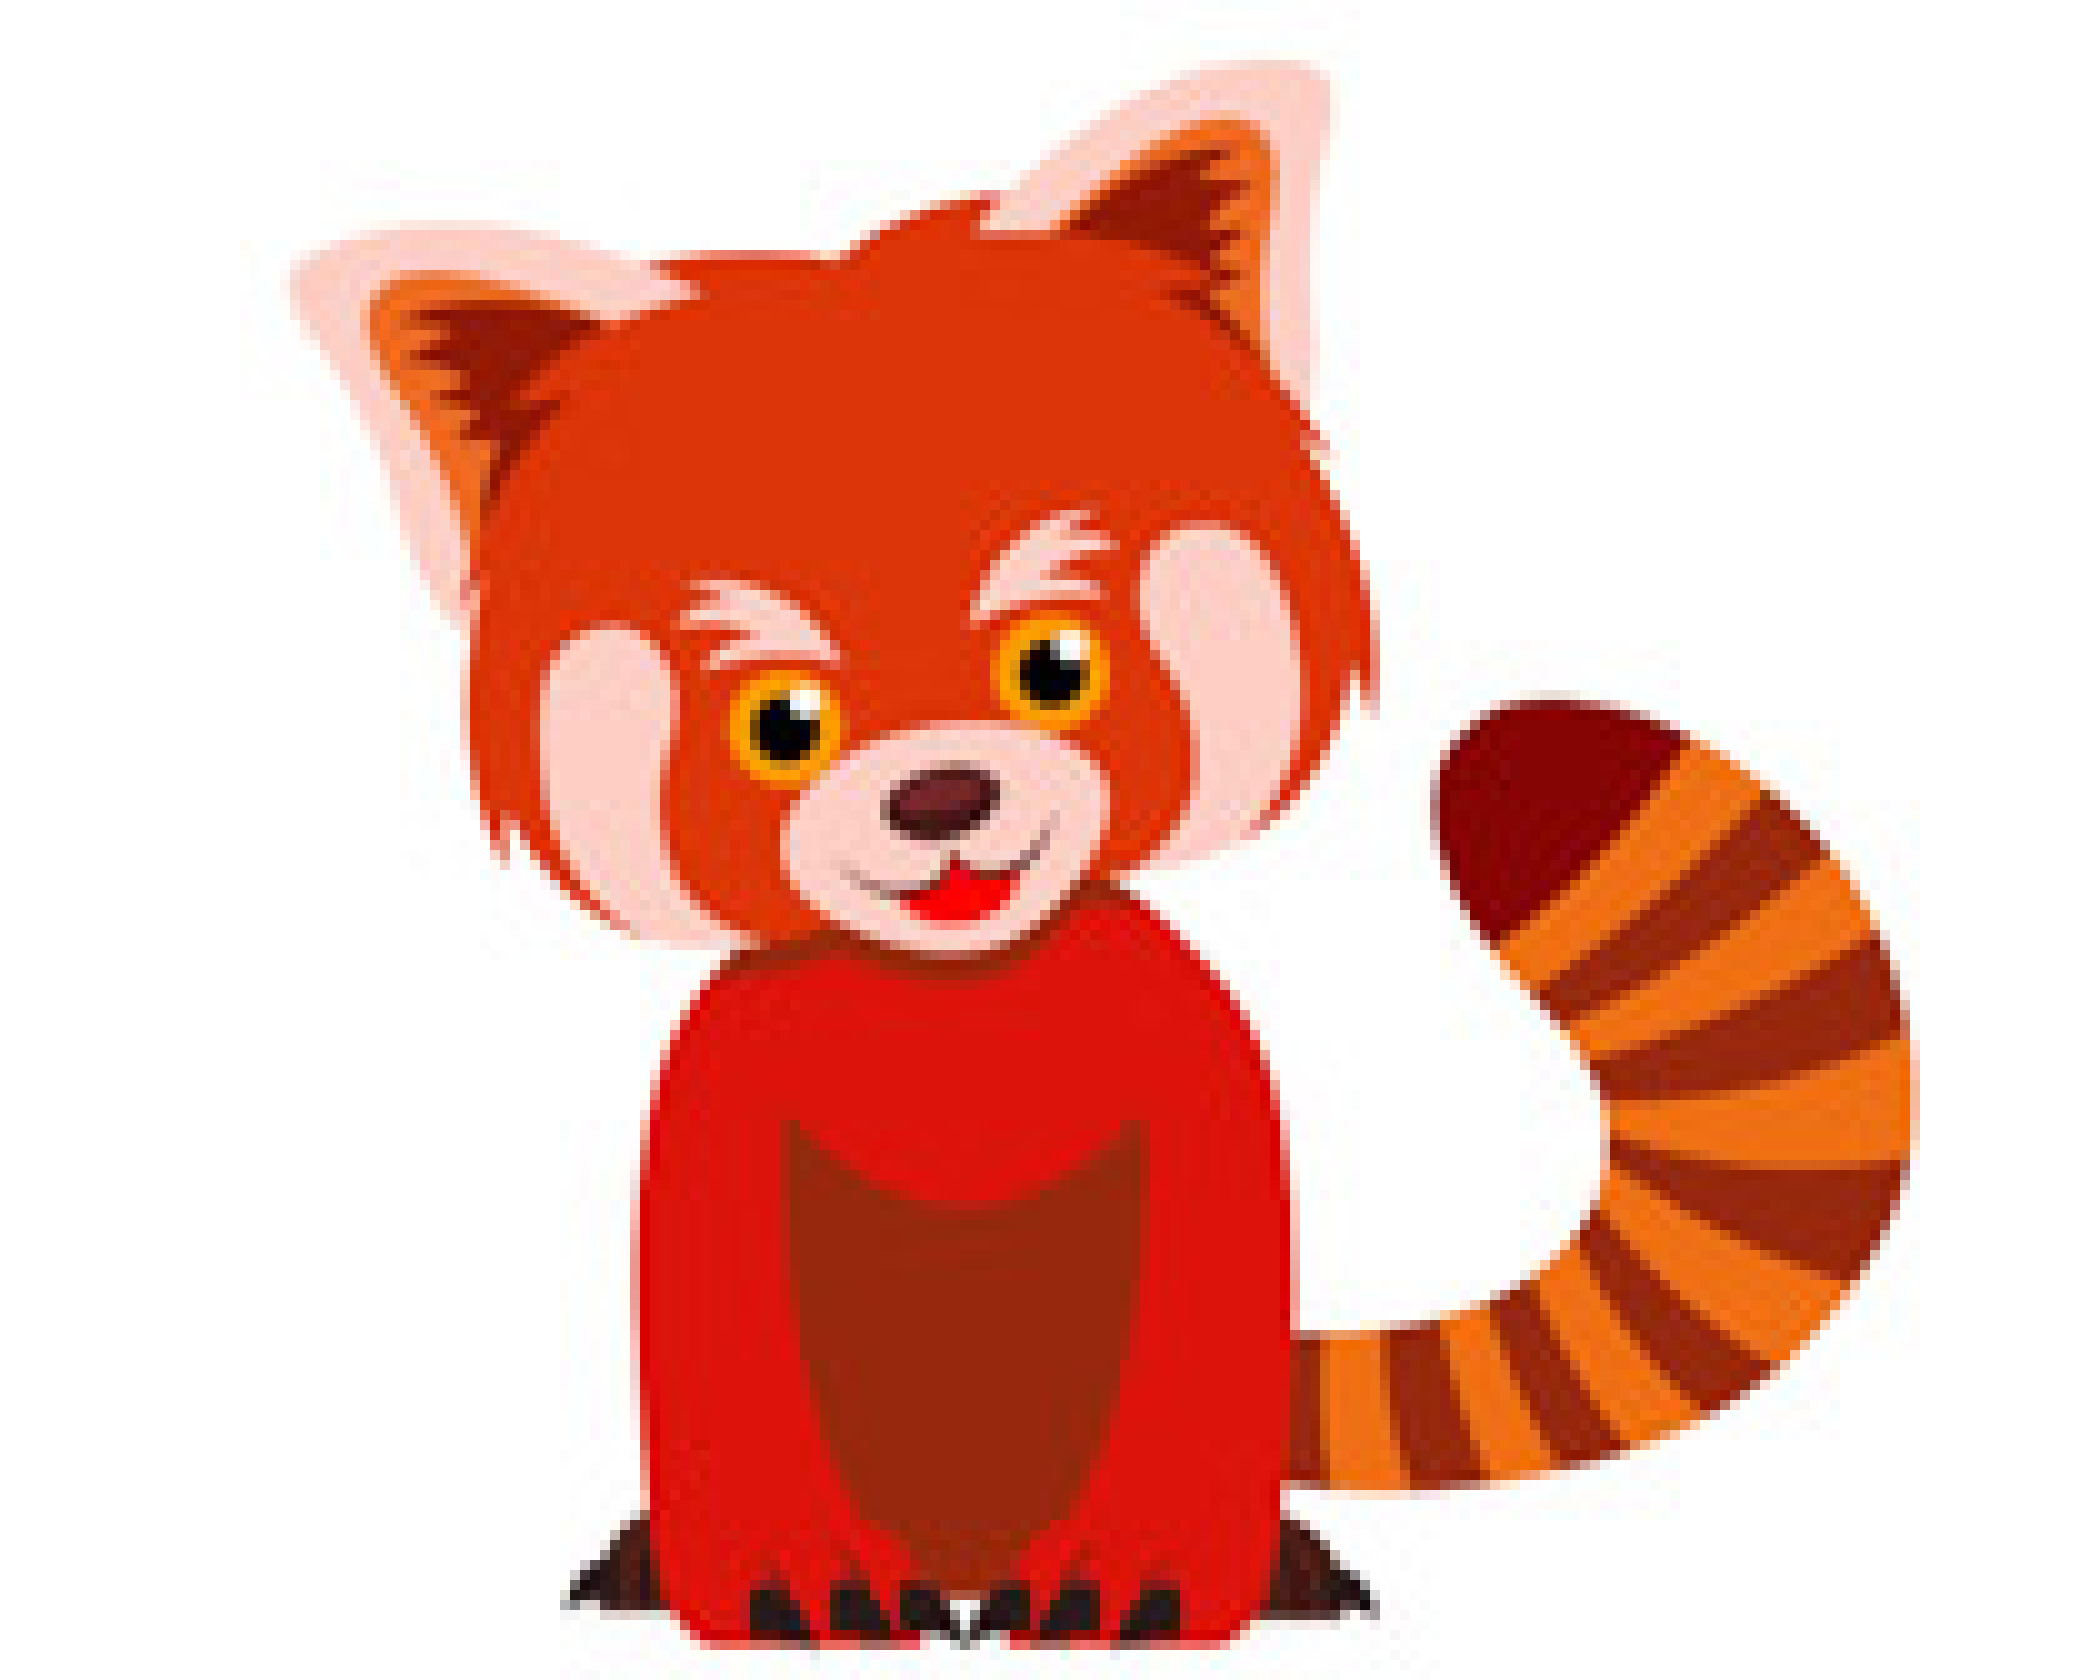

4


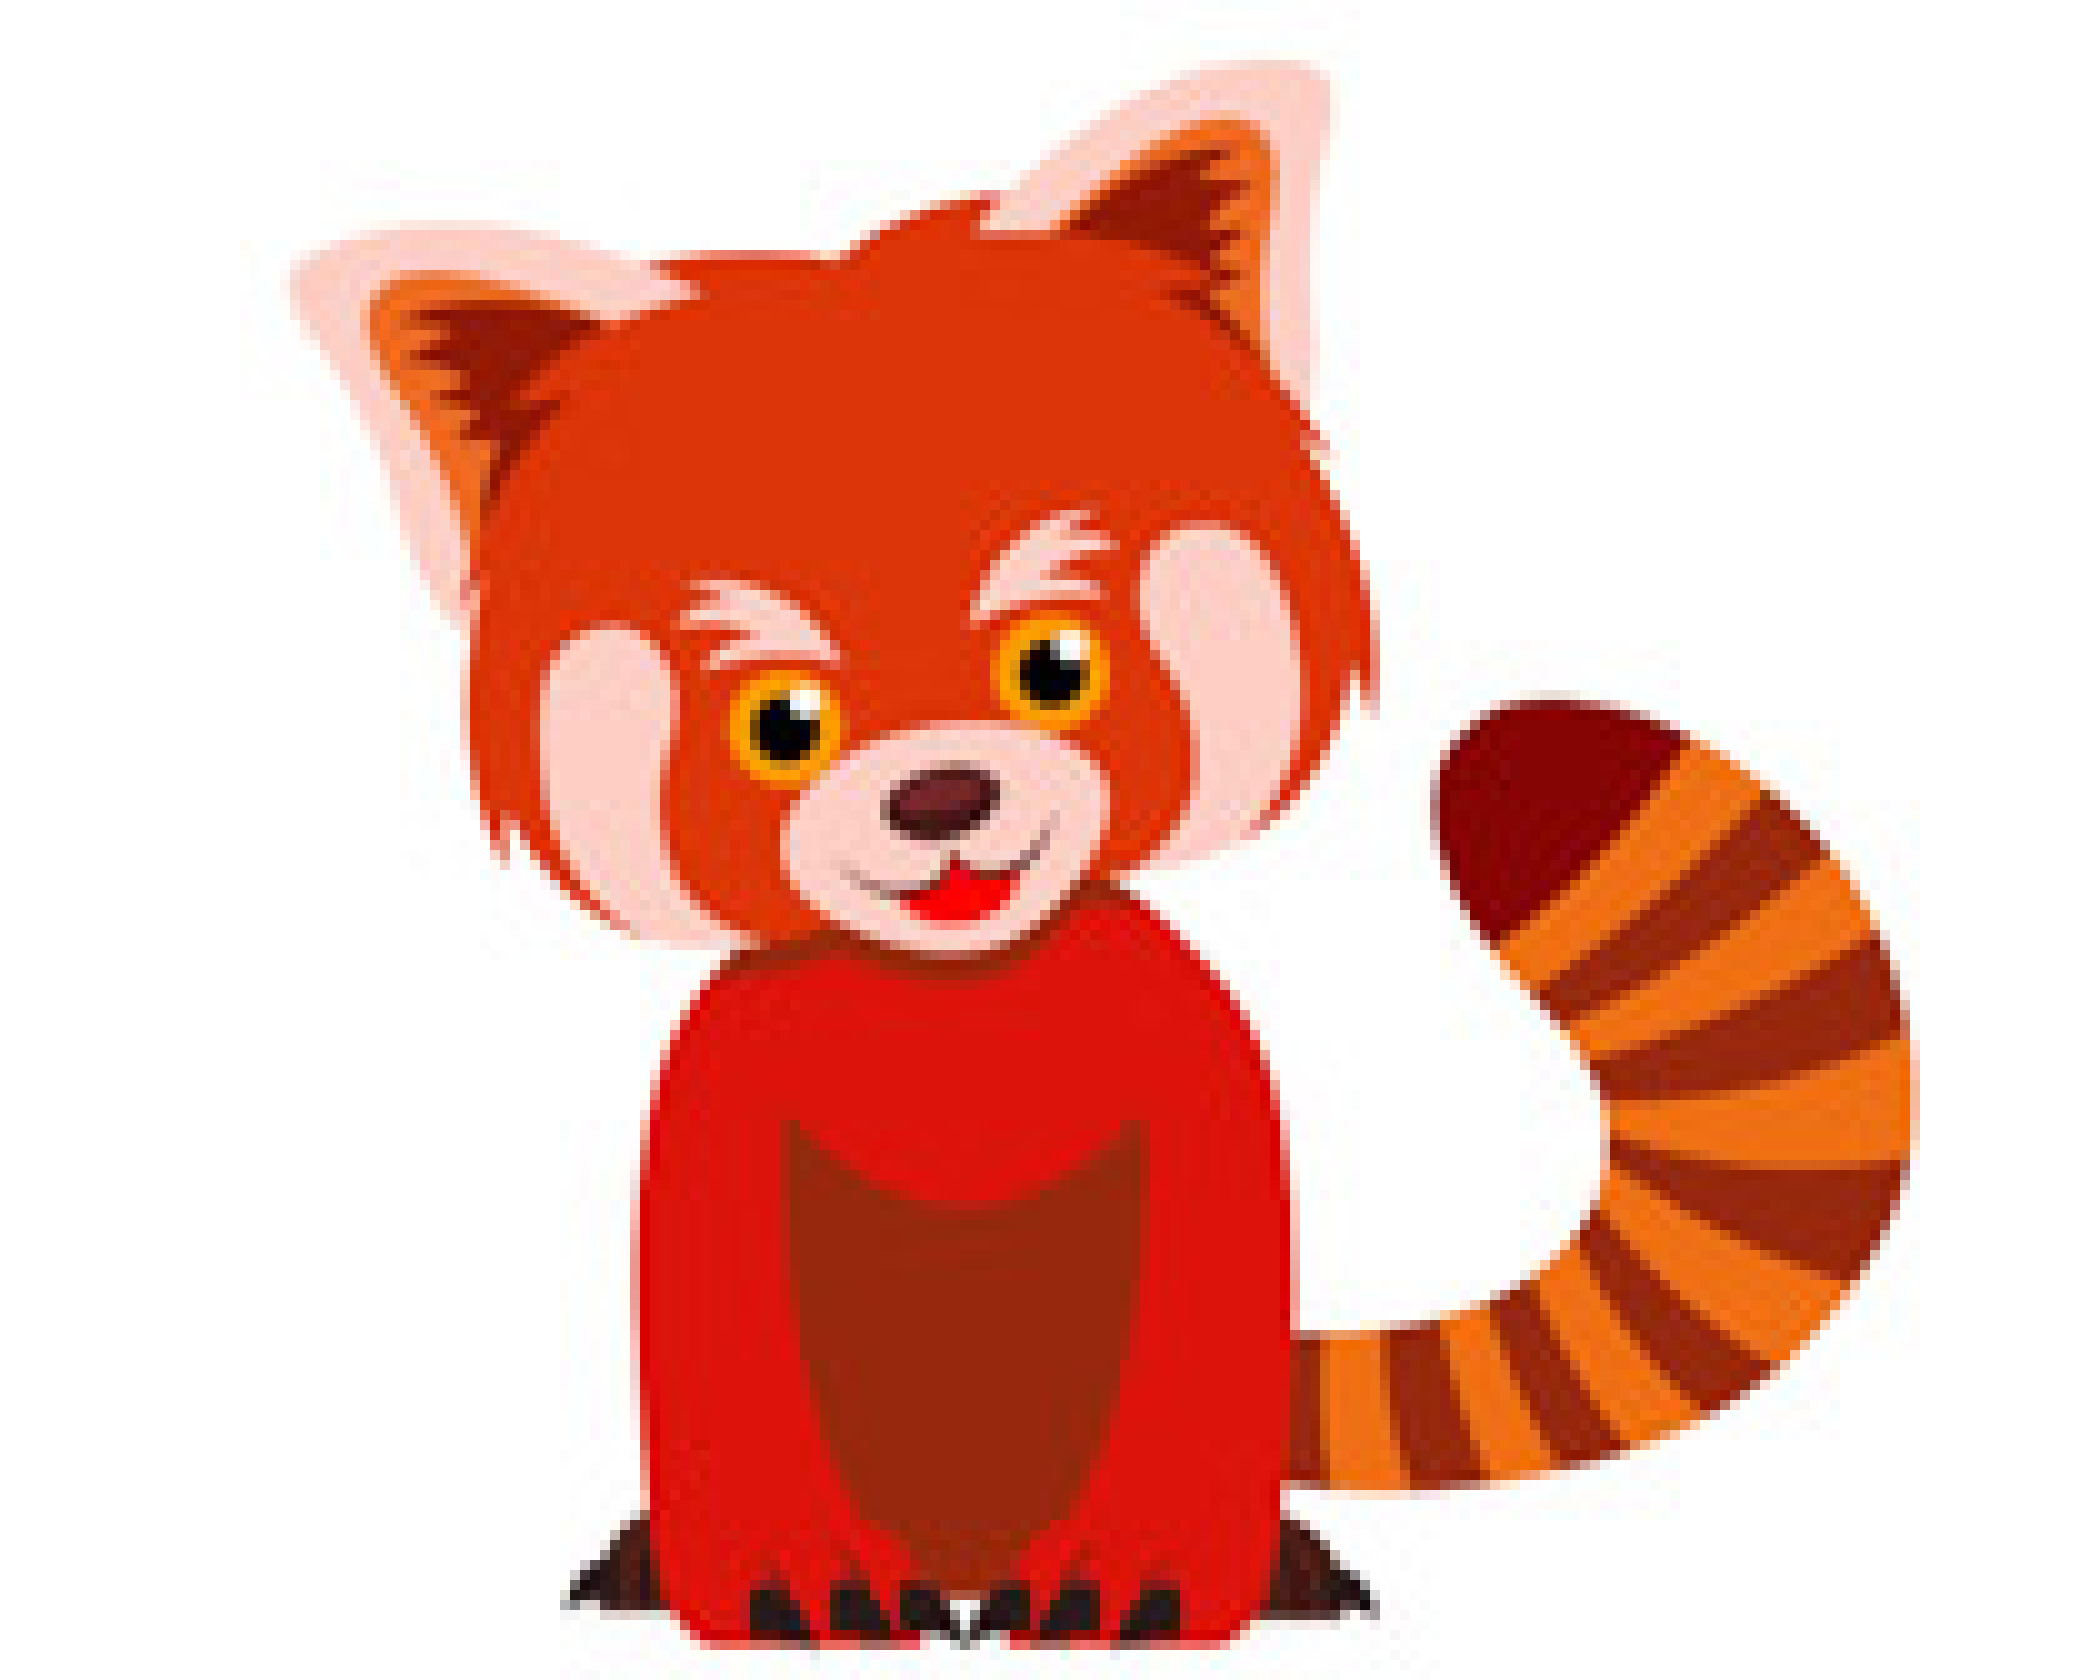

2


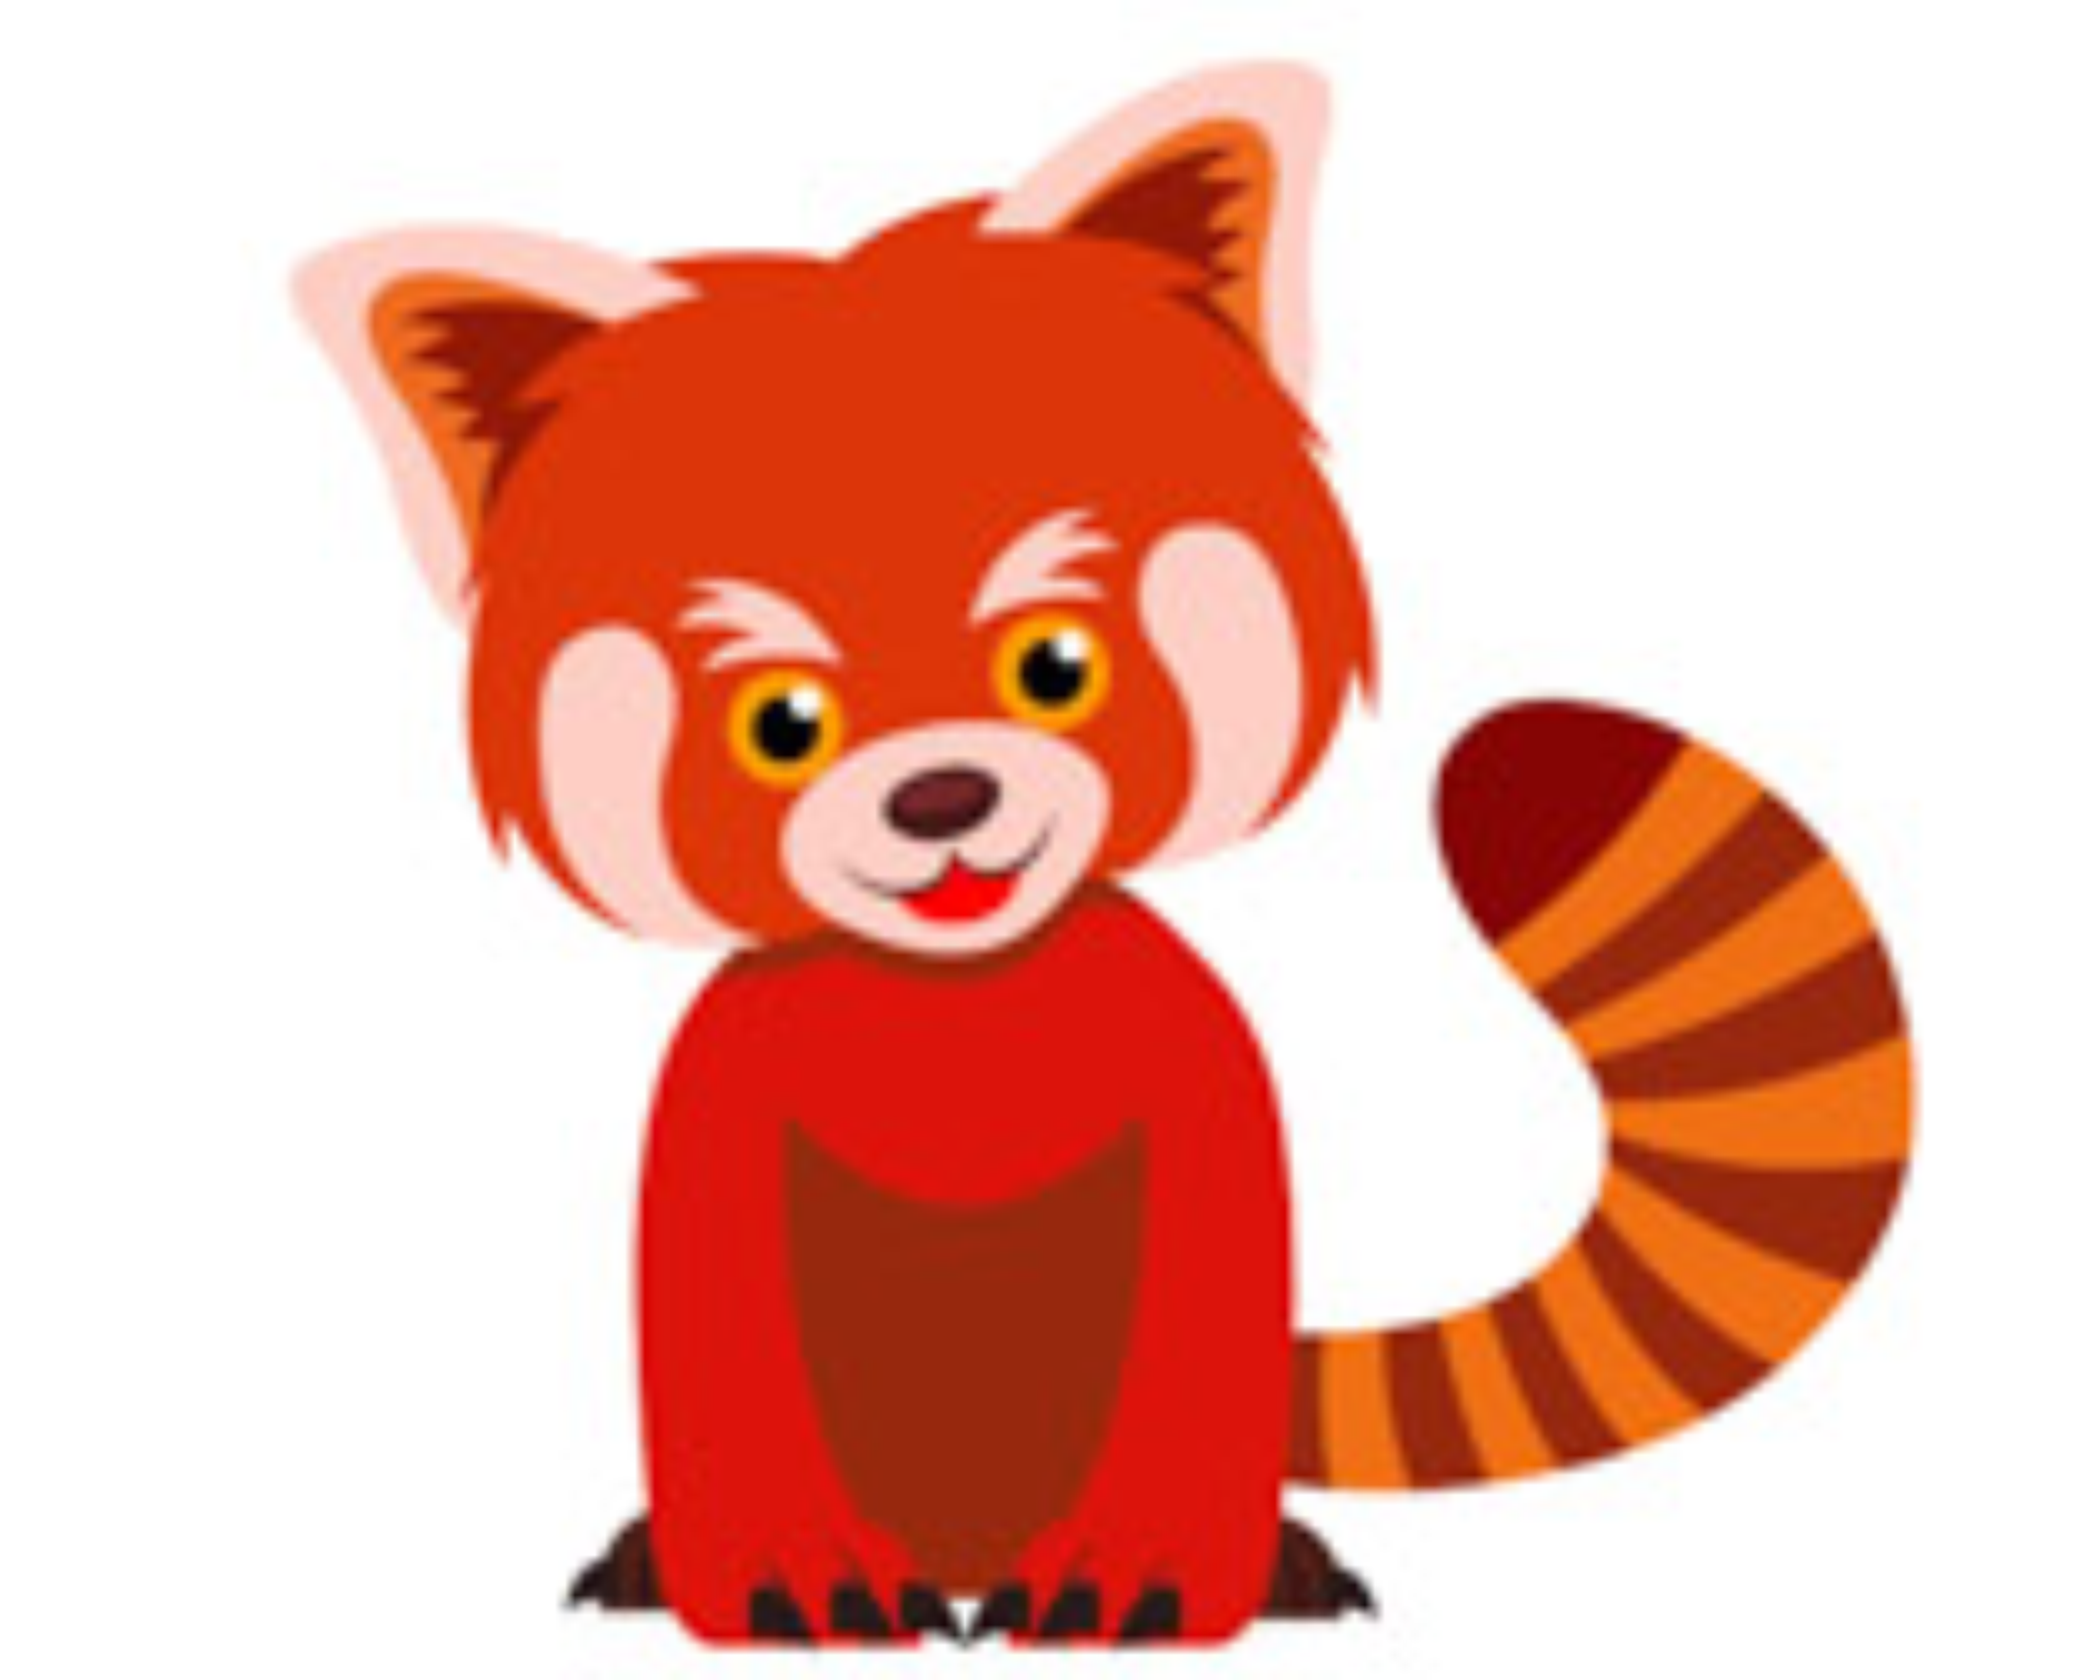

5


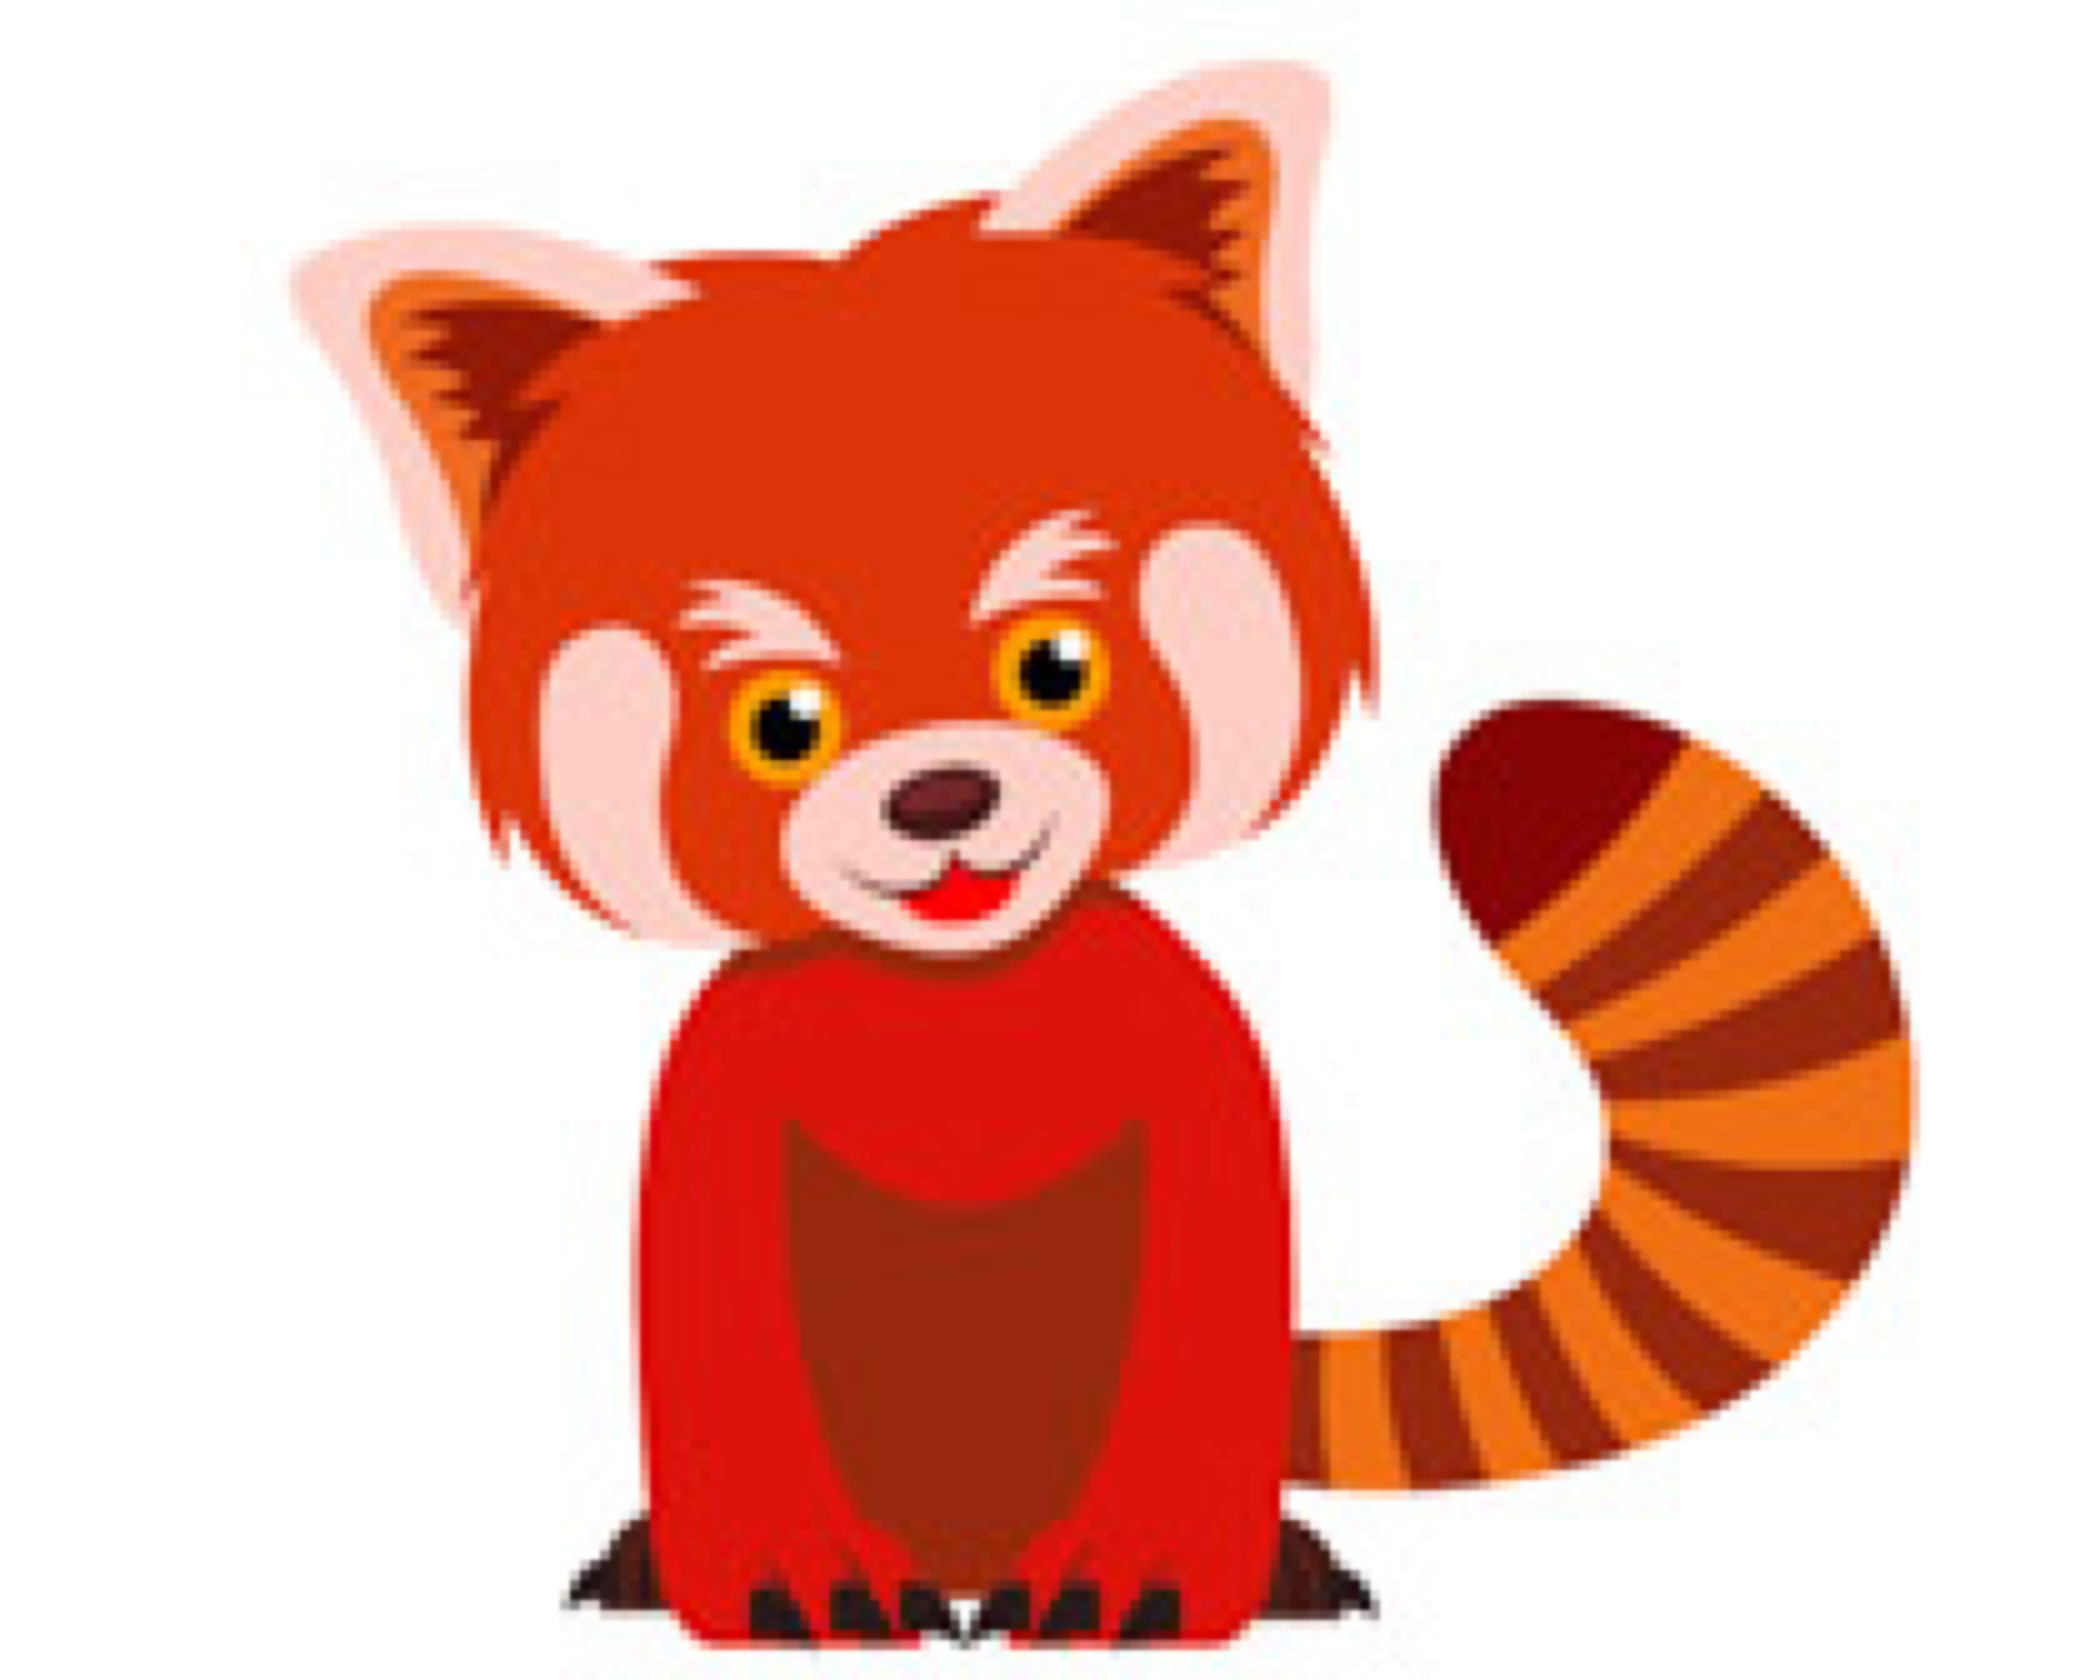

3


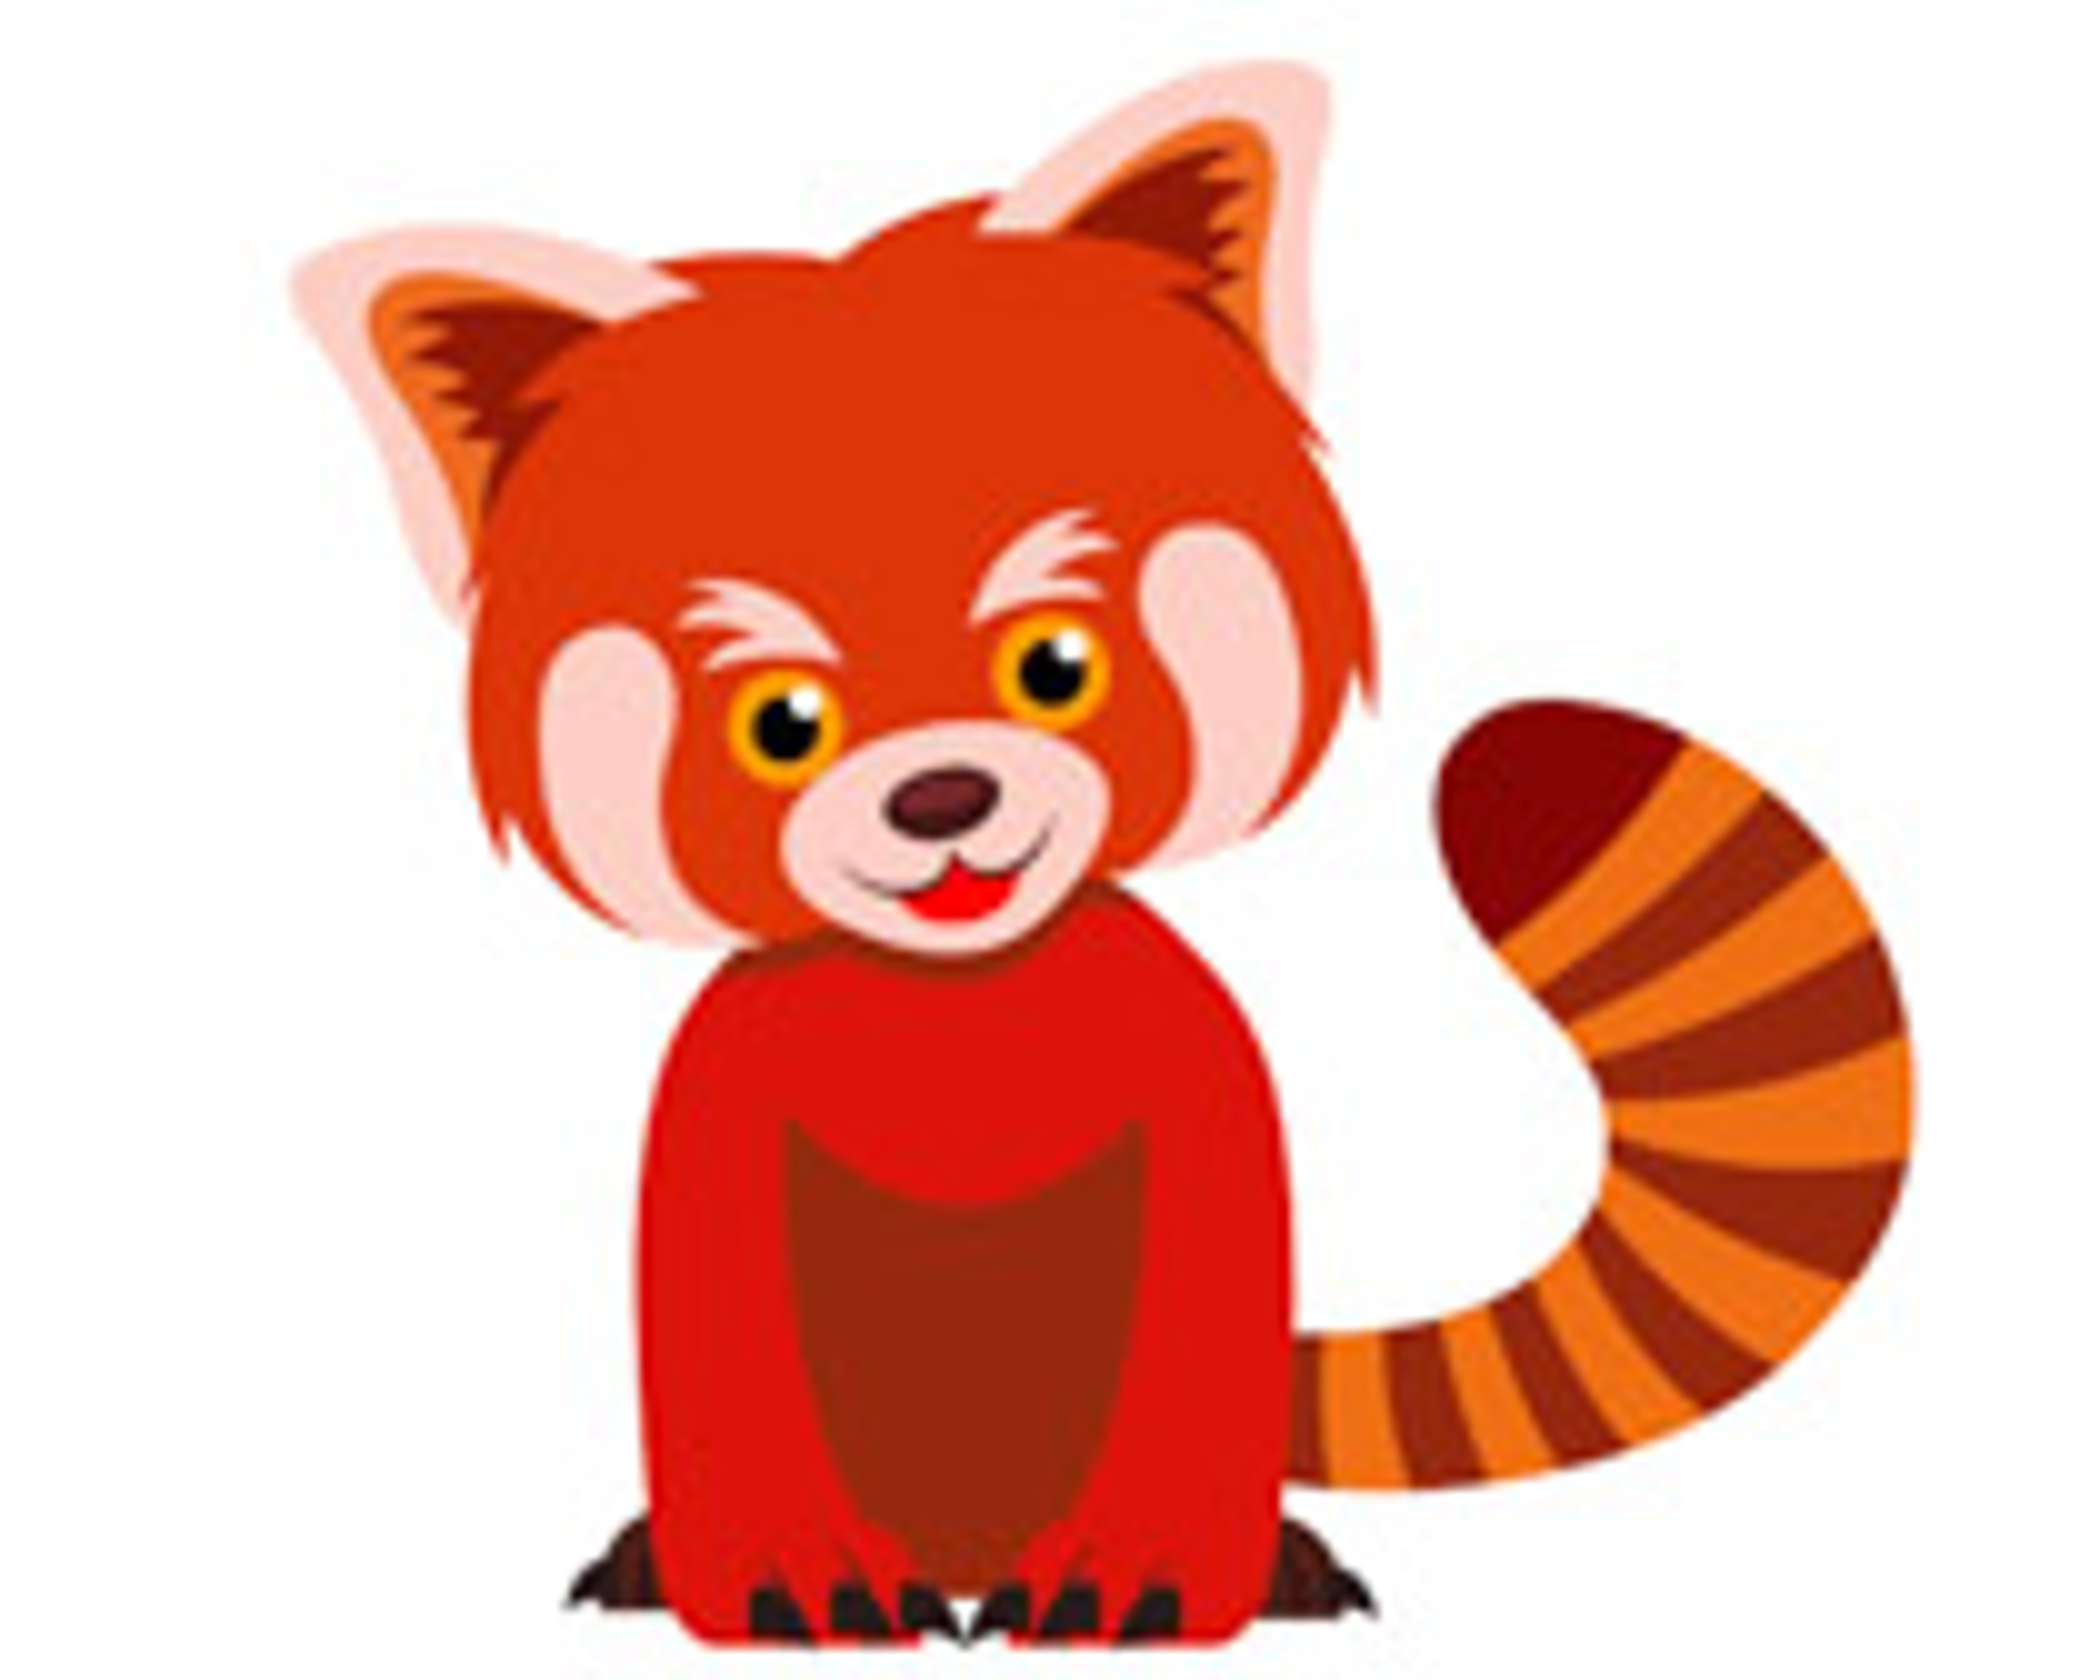

1


In [ ]:
small_image=Image.open('small_image.jpg')
#display initial image
print('Initial image :')
display(small_image)
#Choosing a new size for the image
new_size=(small_image.width*10,small_image.height*10)
#A list of resizing filters
options=[Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS]
for option in options:
    # Print resizing option
    print(option)
    # displaying image 
    display(small_image.resize( new_size, option))